In [39]:
import numpy as np
import pandas as pd
import requests
import re
import os

from bs4 import BeautifulSoup
from datetime import datetime

# Scrap Data

In [3]:
# Final Update 02/01/2024
class Queries():
  def __init__(self):
    self.target = "https://www.webtoons.com/en/dailySchedule"
    self.r = requests.get(self.target)
    self.raw = BeautifulSoup(self.r.content, 'html.parser')

  def raw_query(self):
    return self.raw

  # Query the titles
  def title_query(self):
    title = [p.text for p in self.raw.find_all('p', {'class': 'subj'})]
    return title

  # Query the authors
  def author_query(self):
    author = [p.text for p in self.raw.find_all('p', {'class': 'author'})]
    return author

  # Query the genres
  def genre_query(self):
    genre = [p.text for p in self.raw.find_all('p', {'class': 'genre'})]
    return genre

  # Query # likes
  def likes_query(self):
    likes = [p.text for p in self.raw.find_all('em', {'class': 'grade_num'})]
    return likes

  # Query
  def days_query(self):
    days = [p.text for p in self.raw.find_all('em', {'class': 'grade_num'})]
    return days

  def urls_query(self):
    urls = [p['href'] for p in self.raw.find_all('a', {'class': 'daily_card_item'})]
    return urls

  def img_query(self):
    imgs = [p['src'] for p in self.raw.find_all('img')]
    return imgs

  def description_query(self, url):
    r = requests.get(url)
    raw = BeautifulSoup(r.content, 'html.parser')
    description = raw.find('meta', {'property': 'og:description'})['content']
    return description

  def dict_query(self):
    dict = {'Title': self.title_query(),
            'Author': self.author_query(),
            'Genre': self.genre_query(),
            'Like': self.likes_query(),
            'URL' : self.urls_query(),
            'IMG_URL' : self.img_query()}
    return dict

  def df_query(self):
    df = pd.DataFrame(self.dict_query())
    return df

  def csv_query(self):
    df = self.df_query()
    df.to_csv(f"naver_webtoon_{datetime.today().strftime('%Y%m%d')}.csv")
    files.download(f"naver_webtoon_{datetime.today().strftime('%Y%m%d')}.csv")
    # return df


query = Queries()

In [4]:
df = query.df_query()

In [5]:
df.head()

,Title,Author,Genre,Like,URL,IMG_URL
0,Morgana and Oz,Miyuli,Fantasy,8.1M,https://www.webtoons.com/en/fantasy/morgana-an...,https://webtoon-phinf.pstatic.net/20211201_245...
1,I’m the Queen in This Life,Themis / Omin,Fantasy,7.4M,https://www.webtoons.com/en/fantasy/im-the-que...,https://webtoon-phinf.pstatic.net/20221111_116...
2,The Reborn Young Lord is an Assassin,swingbat / CoffeeLime,Fantasy,"788,028",https://www.webtoons.com/en/fantasy/the-reborn...,https://webtoon-phinf.pstatic.net/20240221_150...
3,SubZero,Junepurrr,Romance,26.8M,https://www.webtoons.com/en/romance/subzero/li...,https://webtoon-phinf.pstatic.net/20181022_300...
4,To The Stars and Back,Peglo,Slice of life,12.6M,https://www.webtoons.com/en/slice-of-life/to-t...,https://webtoon-phinf.pstatic.net/20230821_152...


# Clean Data

In [6]:
# Remove Duplicates

print("Before removing duplicates:",  df.shape)
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

Before removing duplicates: (1337, 6)
After removing duplicates: (1309, 6)


In [7]:
# Unit Conversion

def convert(s):

  if "M" in s:
    return int(1000000 * float(re.sub("[^0-9.\-]","", s)))
  elif "," in s:
    return int(re.sub("[^0-9.\-]","", s))

df['Like'] = df['Like'].apply(lambda s: convert(s))
df.dropna()

<>:7: SyntaxWarning: invalid escape sequence '\-'
<>:9: SyntaxWarning: invalid escape sequence '\-'
<>:7: SyntaxWarning: invalid escape sequence '\-'
<>:9: SyntaxWarning: invalid escape sequence '\-'
/tmp/ipykernel_55632/1893929105.py:7: SyntaxWarning: invalid escape sequence '\-'
  return int(1000000 * float(re.sub("[^0-9.\-]","", s)))
/tmp/ipykernel_55632/1893929105.py:9: SyntaxWarning: invalid escape sequence '\-'
  return int(re.sub("[^0-9.\-]","", s))


,Title,Author,Genre,Like,URL,IMG_URL
0,Morgana and Oz,Miyuli,Fantasy,8100000,https://www.webtoons.com/en/fantasy/morgana-an...,https://webtoon-phinf.pstatic.net/20211201_245...
1,I’m the Queen in This Life,Themis / Omin,Fantasy,7400000,https://www.webtoons.com/en/fantasy/im-the-que...,https://webtoon-phinf.pstatic.net/20221111_116...
2,The Reborn Young Lord is an Assassin,swingbat / CoffeeLime,Fantasy,788028,https://www.webtoons.com/en/fantasy/the-reborn...,https://webtoon-phinf.pstatic.net/20240221_150...
3,SubZero,Junepurrr,Romance,26800000,https://www.webtoons.com/en/romance/subzero/li...,https://webtoon-phinf.pstatic.net/20181022_300...
4,To The Stars and Back,Peglo,Slice of life,12600000,https://www.webtoons.com/en/slice-of-life/to-t...,https://webtoon-phinf.pstatic.net/20230821_152...
...,...,...,...,...,...,...
1332,Just Ask Yuli,Yulius Efferven,Slice of life,30962,https://www.webtoons.com/en/slice-of-life/just...,https://webtoon-phinf.pstatic.net/20150311_126...
1333,The Life of the Three Bears,Mr.D,Slice of life,56810,https://www.webtoons.com/en/slice-of-life/the-...,https://webtoon-phinf.pstatic.net/20150223_194...
1334,Jingle Jungle,Yongjin Kim,Slice of life,56608,https://www.webtoons.com/en/slice-of-life/jing...,https://webtoon-phinf.pstatic.net/20140827_59/...
1335,2015: Space Series,Various Artists,Sci-fi,69715,https://www.webtoons.com/en/sf/2015-space-seri...,https://webtoon-phinf.pstatic.net/20210329_139...


# HASHTAG

In [8]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
from openai import OpenAI

import torch

/home/dchung/miniconda3/envs/webtoon/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
torch.device("cuda" if torch.cuda.is_available() else "cpu")

device(type='cuda')

In [10]:
df.iloc[0]

Title                                         Morgana and Oz
Author                                                Miyuli
Genre                                                Fantasy
Like                                                 8100000
URL        https://www.webtoons.com/en/fantasy/morgana-an...
IMG_URL    https://webtoon-phinf.pstatic.net/20211201_245...
Name: 0, dtype: object

In [11]:
df.head()

,Title,Author,Genre,Like,URL,IMG_URL
0,Morgana and Oz,Miyuli,Fantasy,8100000,https://www.webtoons.com/en/fantasy/morgana-an...,https://webtoon-phinf.pstatic.net/20211201_245...
1,I’m the Queen in This Life,Themis / Omin,Fantasy,7400000,https://www.webtoons.com/en/fantasy/im-the-que...,https://webtoon-phinf.pstatic.net/20221111_116...
2,The Reborn Young Lord is an Assassin,swingbat / CoffeeLime,Fantasy,788028,https://www.webtoons.com/en/fantasy/the-reborn...,https://webtoon-phinf.pstatic.net/20240221_150...
3,SubZero,Junepurrr,Romance,26800000,https://www.webtoons.com/en/romance/subzero/li...,https://webtoon-phinf.pstatic.net/20181022_300...
4,To The Stars and Back,Peglo,Slice of life,12600000,https://www.webtoons.com/en/slice-of-life/to-t...,https://webtoon-phinf.pstatic.net/20230821_152...


In [49]:
os.environ["OPENAI_API_KEY"] = ""

In [34]:
class HashtagGenerator():
    def __init__(self, target, desc, api_key):
        self.target = target
        self.title = self.target['Title']
        self.genre = self.target['Genre']
        self.description = desc
        self.client = OpenAI(api_key = api_key) 

    def guess_genre(self):
        few_shot_prompt = (
            "Example 1: \n"
            "Title: The Adventures of Captain Marvel\n"
            "Genre: Superhero\n"
            "#Superhero #Action #Marvel #Hero #EpicJourney\n\n"
            "Example 2:\n"
            "Title: Celestial Chronicles\n"
            "Genre: Fantasy\n"
            "#Fantasy #Magic #Adventure #EpicQuest #Mythical\n\n"
            "Now, generate 5 catchy and genre-appropriate hashtags for this comic:\n"
        )
        
        system_prompt = "You are a social media content generator specializing in creating hashtags for web comics."
        user_prompt = f"Title: {self.title}\nDescription: {self.description}\nGenre: {self.genre}"

        response = self.client.chat.completions.create(
        model = "gpt-4o-mini",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user","content": few_shot_prompt + user_prompt}
            ],
        )

        hashtags = response.choices[0].message.content
  
        return hashtags

comic = HashtagGenerator(df.iloc[0], query.description_query(df.iloc[0]['URL']), os.environ["OPENAI_API_KEY"])

In [35]:
text = comic.guess_genre()

In [36]:
text

'#WitchVsVampire #ForbiddenLove #MagicAndFangs #CovenConflict #DarkRomance'

In [40]:
def normalize_hashtag(hashtags):
    hashtags = hashtags.lstrip('#')
    hashtags = re.sub(r'([a-z])([A-Z])', r'\1 \2', hashtags)
    return hashtags

In [44]:
hashtags = [normalize_hashtag(hashtag) for hashtag in text.split()]

In [17]:
headers = {
    'User-Agent': 'Mozilla/5.0',
    'Referer': 'https://www.webtoons.com/'
}

image_url = df['IMG_URL'][0]
response = requests.get(image_url, headers=headers, stream=True)
image = Image.open(response.raw)

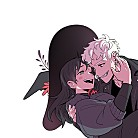

In [18]:
image

In [19]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32") 

/home/dchung/miniconda3/envs/webtoon/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [46]:
inputs = processor(text=hashtags, images=image, return_tensors="pt", padding=True)

In [47]:
with torch.no_grad():
    outputs = model(**inputs)

logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)

In [48]:
top_probs, top_indices = probs.topk(3, dim=1)
top_hashtags = [hashtags[i] for i in top_indices[0]]

print("Top 3 Hashtags:", top_hashtags)

Top 3 Hashtags: ['Witch Vs Vampire', 'Magic And Fangs', 'Coven Conflict']


# Recommendation

In [ ]:
df['Like'].describe()

,Like
count,1.300000e+03
mean,2.763425e+06
std,6.478525e+06
min,7.092000e+03
25%,2.417750e+05
50%,6.799890e+05
75%,2.400000e+06
max,7.260000e+07


In [ ]:
!pip3 install node2vec

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from gensim.models import Word2Vec
from pyvis.network import Network
from networkx.algorithms import simple_paths
from networkx.algorithms.community import greedy_modularity_communities
from node2vec import Node2Vec

import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
genres = df['Genre'].unique()
print(genres)

['Fantasy' 'Romance' 'Slice of life' 'Drama' 'Action' 'Comedy' 'Sports'
 'Supernatural' 'Thriller' 'Informative' 'Horror' 'Mystery' 'Historical'
 'Sci-fi' 'Superhero' 'Heartwarming']


In [ ]:
sentences = [
    ['Fantasy', 'Adventure', 'Action'],
    ['Romance', 'Slice of life', 'Heartwarming'],
    ['Horror', 'Thriller', 'Mystery'],
    ['Sci-fi', 'Action', 'Superhero'],
    ['Comedy', 'Romance', 'Drama'],
    ['Historical', 'Informative'],
    ['Drama', 'Romance'],
    ['Fantasy', 'Supernatural']
]

model = Word2Vec(sentences, vector_size=40, window=2, min_count=1, sg=1)  # CBOW


# Find most similar genres
similar_genres = model.wv.most_similar('Slice of life')
# Not good!
print(similar_genres)

[('Sci-fi', 0.23377379775047302), ('Adventure', 0.21609698235988617), ('Thriller', 0.13797502219676971), ('Mystery', 0.0319298654794693), ('Drama', 0.006596323102712631), ('Horror', 0.005421392619609833), ('Informative', 0.0038444416131824255), ('Romance', -0.006855623330920935), ('Fantasy', -0.013429162092506886), ('Comedy', -0.01583591103553772)]


In [ ]:
class GenreGraph():
  def __init__(self, genres):
    self.G = nx.Graph()
    for genre in genres:
      self.G.add_node(genre)

  def add_edge(self, target, dest, weight):
    self.G.add_edge(target, dest, weight=weight)

  def initialization(self):
    self.G = nx.Graph()

  def draw_graph(self):
    nx.draw(self.G, with_labels=True, font_weight='bold', font_size = 10)
    plt.figure(figsize=(10, 20))
    plt.show(self.G)

graph = GenreGraph(genres)

In [ ]:
# Examples
graph.add_edge('Romance', 'Drama', weight=0.6)
graph.add_edge('Sports', 'Drama', weight=0.75)
graph.add_edge('Historical', 'Drama', weight=0.5)
graph.add_edge('Historical', 'Action', weight=0.5)
graph.add_edge('Comedy', 'Romance', weight=0.3)
graph.add_edge('Comedy', 'Slice of life', weight=0.4)
graph.add_edge('Comedy', 'Drama', weight = 0.7)
graph.add_edge('Romance', 'Slice of life', weight=0.4)

graph.add_edge('Slice of life', 'Heartwarming', weight=0.3)
graph.add_edge('Fantasy', 'Adventure', weight=0.7)
graph.add_edge('Fantasy', 'Supernatural', weight=0.6)
graph.add_edge('Superhero', 'Action', weight = 0.85)
graph.add_edge('Action', 'Adventure', weight=0.8)
graph.add_edge('Sci-fi', 'Action', weight=0.2)
graph.add_edge('Sci-fi', 'Drama', weight=0.4)
graph.add_edge('Fantasy', 'Supernatural', weight=0.75)
graph.add_edge('Fantasy', 'Action', weight=0.75)


graph.add_edge('Thriller', 'Drama', weight=0.6)
graph.add_edge('Mystery', 'Thriller', weight=0.85)
graph.add_edge('Mystery', 'Drama', weight=0.7)
graph.add_edge('Horror', 'Thriller', weight=0.85)

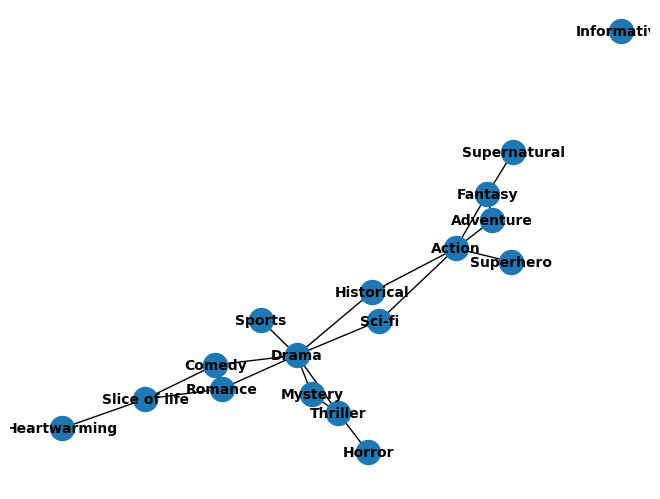

<Figure size 1000x2000 with 0 Axes>

In [ ]:
graph.draw_graph()

In [ ]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

In [ ]:

communities = list(greedy_modularity_communities(G))
for i, community in enumerate(communities):
    print(f"Community {i+1}: {list(community)}")

Community 1: ['Sci-fi', 'Adventure', 'Historical', 'Fantasy', 'Supernatural', 'Superhero', 'Action']
Community 2: ['Thriller', 'Mystery', 'Drama', 'Horror', 'Sports']
Community 3: ['Heartwarming', 'Romance', 'Comedy', 'Slice of life']
Community 4: ['Informative']


In [ ]:
# Perform a simple random walk to find related genres
paths = list(simple_paths.all_simple_paths(G, source='Slice of life', target='Sports'))
print("Paths between 'Romance' and 'Drama':", paths)

Paths between 'Romance' and 'Drama': [['Slice of life', 'Comedy', 'Romance', 'Drama', 'Sports'], ['Slice of life', 'Comedy', 'Drama', 'Sports'], ['Slice of life', 'Romance', 'Drama', 'Sports'], ['Slice of life', 'Romance', 'Comedy', 'Drama', 'Sports']]


In [ ]:
from node2vec import Node2Vec

node2vec = Node2Vec(G, dimensions=8, walk_length=10, num_walks=200, workers=1)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Embedding Dictionary
genre_embeddings = {genre: model.wv[genre] for genre in genres}

Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 200/200 [00:00<00:00, 1679.30it/s]


In [ ]:
genre_embeddings

{'Fantasy': array([ 0.6231522 , -0.79690593,  0.32329333,  1.6671882 , -1.2470629 ,
         0.07602378,  0.00326426, -0.45105425], dtype=float32),
 'Romance': array([ 0.83184576, -0.32083505, -0.73383963,  0.5141132 ,  0.08635167,
        -0.15076587,  1.0598778 ,  0.61495906], dtype=float32),
 'Slice of life': array([ 1.4802759 , -0.0346152 , -0.95987433,  0.38504872, -0.0454069 ,
        -0.3123206 ,  1.478147  ,  0.5512022 ], dtype=float32),
 'Drama': array([ 0.10798022,  0.01960409, -0.4201796 ,  0.6445075 , -0.18455414,
        -0.10598103,  1.2490336 ,  0.5690122 ], dtype=float32),
 'Action': array([ 0.27892536, -0.7846264 ,  0.42704225,  1.1769809 , -1.0481112 ,
         0.36438504,  0.31416434, -0.12415294], dtype=float32),
 'Comedy': array([ 0.8382286 , -0.43623716, -0.65792465,  0.44123593,  0.20495406,
        -0.20893303,  1.163819  ,  0.5190084 ], dtype=float32),
 'Sports': array([ 0.04624932, -0.35474232, -0.48631164,  0.70544547, -0.02547583,
        -0.00410537,  1.018

In [ ]:
b = np.array([genre_embeddings[k] for k in a])

In [ ]:
scaler = MinMaxScaler()
encoder = OneHotEncoder(sparse=False)

In [ ]:
data = df.loc[:, ['Title', 'Genre', 'Like']]

In [ ]:
genres_encoded = encoder.fit_transform(data[['Genre']])
likes_normalized = scaler.fit_transform(data[['Like']])
X = np.hstack((b, likes_normalized))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
knn = NearestNeighbors(n_neighbors=20, metric='euclidean')

In [ ]:
class Recommendor():
  def __init__(self, data, knn):
    self.data = data
    self.knn = knn

  def train(self):
    knn.fit(data)
    print("Train Completed")

  def recommend(self, target_number):
    distances, indices = self.knn.kneighbors([X[target_number]])
    return indices[0]

In [ ]:
result = Recommendor(X, knn).recommend(462)

In [ ]:
target_number = 462
data.iloc[target_number]

,487
Title,Letters on the Wall
Genre,Romance
Like,297005


In [ ]:
data.iloc[462]

,487
Title,Letters on the Wall
Genre,Romance
Like,297005


In [ ]:
distances, indices = knn.kneighbors([X[target_number]])

In [ ]:
recommended_indices = indices[0]

In [ ]:
recommended_titles = df.iloc[recommended_indices]
print(recommended_titles)

                               Title                      Author    Genre  \
487              Letters on the Wall  Jaelyngs / MissBlackClover  Romance   
558              This Wasn't My Plan         BOM SOHEE / SEI KIM  Romance   
533                   A Demon's Wish            Zigozi9 / Muneki  Romance   
573   How a Goddess Wins Over Tigers              Awan / Chungla  Romance   
160             Quantum Entanglement                  Arts Angel  Romance   
..                               ...                         ...      ...   
691      My Younger Brother's Friend                       Nimni  Romance   
643           Secretary Out-of-Order         QuornQuorn / Parand  Romance   
443                  Iseop’s Romance              248 / Anna Kim  Romance   
480  Trash Belongs in the Trash Can!                   EDDiERiNG  Romance   
248           No Marriage is Perfect         Lee Dahong / Long.B  Romance   

        Like                                                URL  
487   297

# Download

In [ ]:
# to_csv
Queries().csv_query()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>